# Set up and run a radiative-convective equilibrium simulation

2020-08-28 10:56:12 MainProcess:INFO:root:Created Konrad object:
RCE(
    atmosphere=Atmosphere,
    radiation=RRTMG,
    ozone=OzonePressure,
    humidity=FixedRH,
    surface=SlabOcean,
    cloud=ClearSky,
    convection=HardAdjustment,
    lapserate=MoistLapseRate,
    upwelling=NoUpwelling,
    diurnal_cycle=False,
    timestep=16:00:00,
    time=0001-01-01 00:00:00,
    max_duration=6000 days, 0:00:00,
    niter=0,
    writeevery=1 day, 0:00:00,
    last_written=0001-01-01 00:00:00,
    logevery=100,
    delta=0.0,
    deltaT=None,
    converged=False,
    outfile=None,
    nchandler=None,
    experiment=RCE,
    co2_adjustment_timescale=nan,
    timestep_adjuster=None,
)
2020-08-28 10:56:12 MainProcess:INFO:konrad.core:Start RCE model run.
2020-08-28 10:56:12 MainProcess:INFO:konrad.core:Enter iteration 0.
2020-08-28 10:56:14 MainProcess:INFO:konrad.core:Enter iteration 100.
2020-08-28 10:56:17 MainProcess:INFO:konrad.core:Enter iteration 200.
2020-08-28 10:56:19 MainProcess:INFO

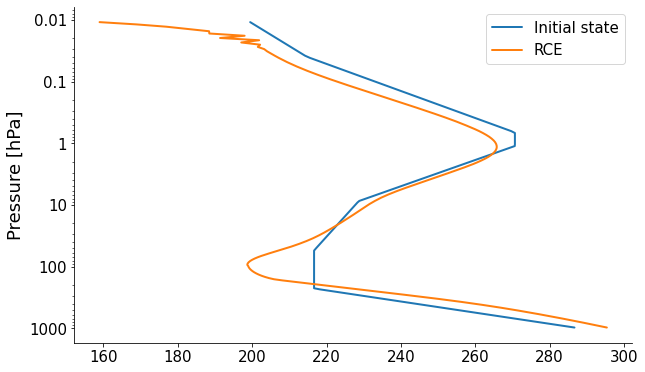

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from typhon import plots

import konrad


konrad.enable_logging()

plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)

atmosphere = konrad.atmosphere.Atmosphere(phlev)

atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.

# Plot the initial temperature profile (for comparison).
plt.style.use(plots.styles('typhon'))
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')

# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    radiation=konrad.radiation.RRTMG(),  # Use RRTMG radiation scheme.
    humidity = konrad.humidity.FixedRH(rh_func=konrad.humidity.HeightConstant()), 
                            #Add a relative humidity profile preserved under temperature changes
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration='6000d',  # Set maximum runtime.
    logevery=100,  # Print progression of model run
)
rce.run()  # Start the simulation.

# Plot the equilibrium temperature profile.
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='RCE')
ax.legend()